This research will analyze the frequency of infant names from 1880 to 2010 based on a Social Security Administration dataset. Using this dataset, I have performed a variety of tasks.
- Display the percentage of infants who have been given a certain name throughout time.
- Determine the relative rank of a name. 
- Identify the most popular names in each year or the names whose popularity has increased or decreased the most.
- Analyzed the following patterns in names: vowels, consonants, length, general variety, change in spelling, initial and final letters.
- Analyze external sources of trends: biblical names, celebrities, demographic shifts

After downloading the "National Data" file names.zip and decompressing it, I have created a directory containing a collection of files such as yob1880.txt.


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
ls

NO2_data.ipynb                  pd_offsets.ipynb
Untitled.ipynb                  period_index.ipynb
airquality.ipynb                resample_shift_intervals.ipynb
apply_applymap.ipynb            time_date_pandas.ipynb
bitly_analysis.ipynb            timedelta.ipynb
book/                           timedelta_index.ipynb
different_format_time.ipynb     timestamp.ipynb
movieLens.ipynb                 titanic/
no2_concentrations.png          web_tz_windows.ipynb


In [5]:
path='book/babynames/yob1880.txt'

In [8]:
names1880=pd.read_csv(path, names=['name', 'sex','births'])
names1880

,name,sex,births
0,Mary,F,7065
1,Anna,F,2604
2,Emma,F,2003
3,Elizabeth,F,1939
4,Minnie,F,1746
...,...,...,...
1995,Woodie,M,5
1996,Worthy,M,5
1997,Wright,M,5
1998,York,M,5


In [10]:
#calculate the total number of birth by sex
names1880.groupby('sex')['births'].sum()

sex
F     90993
M    110493
Name: births, dtype: int64

In [21]:
#merge the files
years=range(1880,2011)
pieces=[]

columns=['name','sex','births']

for year in years:
    path='book/babynames/yob%d.txt' %year
    frame=pd.read_csv(path,names=columns)
    frame['year']=year
    pieces.append(frame)

In [22]:
pieces


[           name sex  births  year
 0          Mary   F    7065  1880
 1          Anna   F    2604  1880
 2          Emma   F    2003  1880
 3     Elizabeth   F    1939  1880
 4        Minnie   F    1746  1880
 ...         ...  ..     ...   ...
 1995     Woodie   M       5  1880
 1996     Worthy   M       5  1880
 1997     Wright   M       5  1880
 1998       York   M       5  1880
 1999  Zachariah   M       5  1880
 
 [2000 rows x 4 columns],
            name sex  births  year
 0          Mary   F    6919  1881
 1          Anna   F    2698  1881
 2          Emma   F    2034  1881
 3     Elizabeth   F    1852  1881
 4      Margaret   F    1658  1881
 ...         ...  ..     ...   ...
 1930     Wiliam   M       5  1881
 1931     Wilton   M       5  1881
 1932       Wing   M       5  1881
 1933       Wood   M       5  1881
 1934     Wright   M       5  1881
 
 [1935 rows x 4 columns],
            name sex  births  year
 0          Mary   F    8149  1882
 1          Anna   F    3143  1882

In [23]:
#Concatenate everything into a single DataFrame
names=pd.concat(pieces, ignore_index=True)

In [24]:
names

,name,sex,births,year
0,Mary,F,7065,1880
1,Anna,F,2604,1880
2,Emma,F,2003,1880
3,Elizabeth,F,1939,1880
4,Minnie,F,1746,1880
...,...,...,...,...
1690779,Zymaire,M,5,2010
1690780,Zyonne,M,5,2010
1690781,Zyquarius,M,5,2010
1690782,Zyran,M,5,2010


In [26]:
#aggregating the data by year and sex using groupby or pivot_table
total_births=names.pivot_table(values='births',index='year', columns='sex', aggfunc=sum )

In [27]:
total_births.tail()

sex,F,M
year,,
2006,1896468,2050234
2007,1916888,2069242
2008,1883645,2032310
2009,1827643,1973359
2010,1759010,1898382


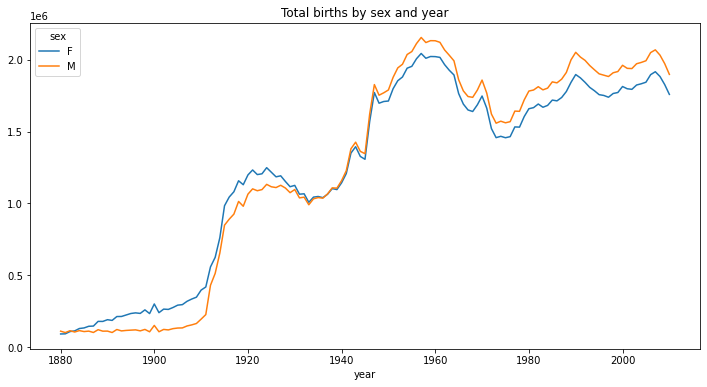

In [35]:
total_births.plot(figsize=(12,6),title='Total births by sex and year')
plt.show()

In [37]:
#calculate the propability with the fraction of babies name relative the total number of birth
def add_prop(group):
    group['prop']=group.births/group.births.sum()
    return group

names=names.groupby(['year','sex']).apply(add_prop)

In [38]:
names

,name,sex,births,year,prop
0,Mary,F,7065,1880,0.077643
1,Anna,F,2604,1880,0.028618
2,Emma,F,2003,1880,0.022013
3,Elizabeth,F,1939,1880,0.021309
4,Minnie,F,1746,1880,0.019188
...,...,...,...,...,...
1690779,Zymaire,M,5,2010,0.000003
1690780,Zyonne,M,5,2010,0.000003
1690781,Zyquarius,M,5,2010,0.000003
1690782,Zyran,M,5,2010,0.000003


In [39]:
#check the sanity of prop column sums to 1 within all the groups
names.groupby(['year','sex']).prop.sum()

year  sex
1880  F      1.0
      M      1.0
1881  F      1.0
      M      1.0
1882  F      1.0
            ... 
2008  M      1.0
2009  F      1.0
      M      1.0
2010  F      1.0
      M      1.0
Name: prop, Length: 262, dtype: float64

<AxesSubplot:>

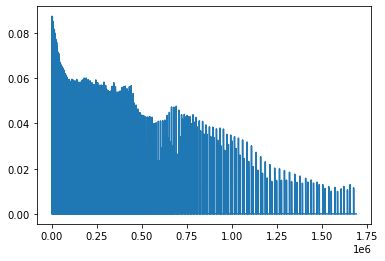

In [40]:
names.prop.plot()

In [41]:
#subset of data for further analysis
def get_top1000(group):
    return group.sort_values(by='births',ascending=False)[:1000]

grouped=names.groupby(['year','sex'])
top1000=grouped.apply(get_top1000)
top1000.reset_index(inplace=True,drop=True)

In [42]:
top1000

,name,sex,births,year,prop
0,Mary,F,7065,1880,0.077643
1,Anna,F,2604,1880,0.028618
2,Emma,F,2003,1880,0.022013
3,Elizabeth,F,1939,1880,0.021309
4,Minnie,F,1746,1880,0.019188
...,...,...,...,...,...
261872,Camilo,M,194,2010,0.000102
261873,Destin,M,194,2010,0.000102
261874,Jaquan,M,194,2010,0.000102
261875,Jaydan,M,194,2010,0.000102


# Analyzing Naming Trends

In [43]:
boys=top1000[top1000.sex=='M']
girls=top1000[top1000.sex=='F']

In [44]:
total_births=top1000.pivot_table(values='births',index='year',columns='name', aggfunc=sum)

In [45]:
total_births.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 131 entries, 1880 to 2010
Columns: 6868 entries, Aaden to Zuri
dtypes: float64(6868)
memory usage: 6.9 MB


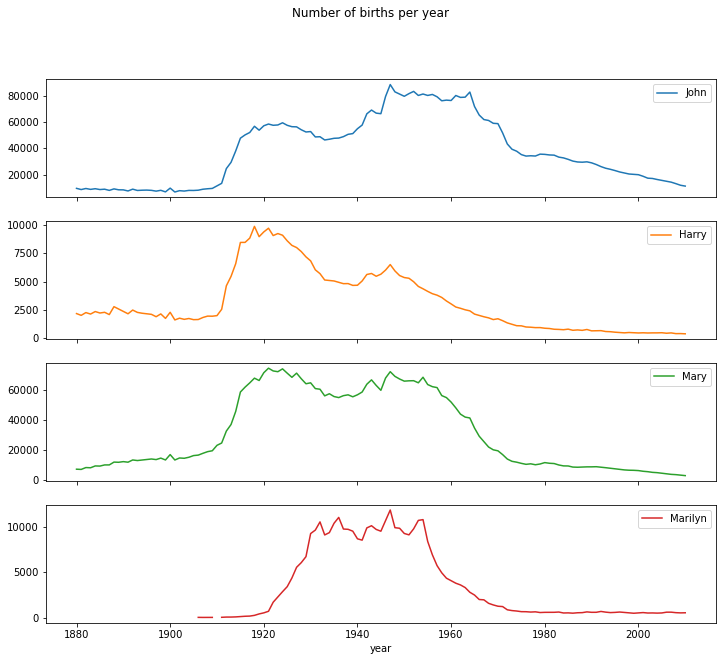

In [48]:
subset=total_births[['John','Harry','Mary','Marilyn']]
subset.plot(subplots=True, figsize=(12,10),grid=False, title='Number of births per year')
plt.show()

# Measuring the increase in naming diversity

In [49]:
table=top1000.pivot_table(values='prop',index='year',columns='sex', aggfunc=sum)

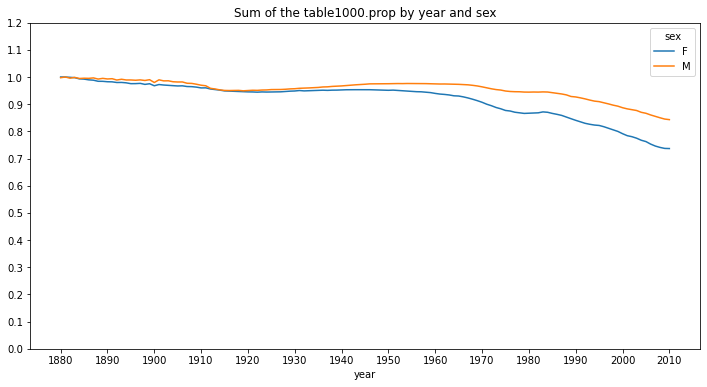

In [52]:
table.plot(figsize=(12,6),title='Sum of the table1000.prop by year and sex',
          yticks=np.linspace(0,1.2,13),xticks=range(1880,2020,10))
plt.show()

In [53]:
df=boys[boys.year==2010]
df

,name,sex,births,year,prop
260877,Jacob,M,21875,2010,0.011523
260878,Ethan,M,17866,2010,0.009411
260879,Michael,M,17133,2010,0.009025
260880,Jayden,M,17030,2010,0.008971
260881,William,M,16870,2010,0.008887
...,...,...,...,...,...
261872,Camilo,M,194,2010,0.000102
261873,Destin,M,194,2010,0.000102
261874,Jaquan,M,194,2010,0.000102
261875,Jaydan,M,194,2010,0.000102


In [55]:
prop_cumsum=df.sort_values(by='prop',ascending=False).prop.cumsum()

In [57]:
prop_cumsum[:10]

260877    0.011523
260878    0.020934
260879    0.029959
260880    0.038930
260881    0.047817
260882    0.056579
260883    0.065155
260884    0.073414
260885    0.081528
260886    0.089621
Name: prop, dtype: float64

In [58]:
prop_cumsum.values.searchsorted(0.5)

116

In [59]:
df=boys[boys.year==1900]

In [60]:
in1900=df.sort_values(by='prop',ascending=False).prop.cumsum()

In [64]:
in1900.values.searchsorted(0.5)+1

25

In [65]:
def get_quantile_count(group, q=0.5):
    group=group.sort_values(by='prop',ascending=False)
    return group.prop.cumsum().values.searchsorted(q)+1

diversity=top1000.groupby(['year','sex']).apply(get_quantile_count)

In [66]:
diversity=diversity.unstack('sex')

In [67]:
diversity.head()

sex,F,M
year,,
1880,38,14
1881,38,14
1882,38,15
1883,39,15
1884,39,16


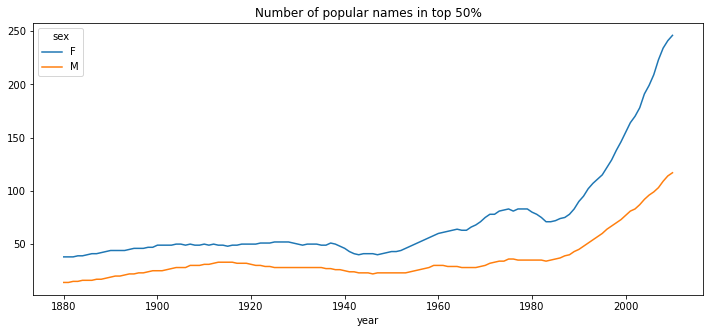

In [71]:
diversity.plot(figsize=(12,5),title='Number of popular names in top 50%')
plt.show()

`Observation`:we can see that girl names have always been more diverse than boy names, and they have only become more so over time.

# The last letter revolution

In [72]:
#extract last letter from name column
get_last_letter=lambda x: x[-1]
last_letters=names.name.map(get_last_letter)
last_letters.name='last_latter'

In [73]:
table=names.pivot_table('births',index=last_letters,
                        columns=['sex','year'], aggfunc=sum)

In [74]:
subtable=table.reindex(columns=[1910,1960,2010],level='year')
subtable.head()

sex                 F                            M                    
year             1910      1960      2010     1910      1960      2010
last_latter                                                           
a            108376.0  691247.0  670605.0    977.0    5204.0   28438.0
b                 NaN     694.0     450.0    411.0    3912.0   38859.0
c                 5.0      49.0     946.0    482.0   15476.0   23125.0
d              6750.0    3729.0    2607.0  22111.0  262112.0   44398.0
e            133569.0  435013.0  313833.0  28655.0  178823.0  129012.0

In [75]:
subtable.sum()

sex  year
F    1910     396416.0
     1960    2022062.0
     2010    1759010.0
M    1910     194198.0
     1960    2132588.0
     2010    1898382.0
dtype: float64

In [76]:
letter_prop=subtable/subtable.sum()
letter_prop

sex                 F                             M                    
year             1910      1960      2010      1910      1960      2010
last_latter                                                            
a            0.273390  0.341853  0.381240  0.005031  0.002440  0.014980
b                 NaN  0.000343  0.000256  0.002116  0.001834  0.020470
c            0.000013  0.000024  0.000538  0.002482  0.007257  0.012181
d            0.017028  0.001844  0.001482  0.113858  0.122908  0.023387
e            0.336941  0.215133  0.178415  0.147556  0.083853  0.067959
f                 NaN  0.000010  0.000055  0.000783  0.004325  0.001188
g            0.000144  0.000157  0.000374  0.002250  0.009488  0.001404
h            0.051529  0.036224  0.075852  0.045562  0.037907  0.051670
i            0.001526  0.039965  0.031734  0.000844  0.000603  0.022628
j                 NaN       NaN  0.000090       NaN       NaN  0.000769
k            0.000121  0.000156  0.000356  0.036581  0.049384  0.018541
l            0.043189  0.033867  0.026356  0.065016  0.104904  0.070367
m            0.001201  0.008613  0.002588  0.058044  0.033827  0.024657
n            0.079240  0.130687  0.140210  0.143415  0.152522  0.362771
o            0.001660  0.002439  0.001243  0.017065  0.012829  0.042681
p            0.000018  0.000023  0.000020  0.003172  0.005675  0.001269
q                 NaN       NaN  0.000030       NaN       NaN  0.000180
r            0.013390  0.006764  0.018025  0.064481  0.031034  0.087477
s            0.039042  0.012764  0.013332  0.130815  0.102730  0.065145
t            0.027438  0.015201  0.007830  0.072879  0.065655  0.022861
u            0.000684  0.000574  0.000417  0.000124  0.000057  0.001221
v                 NaN  0.000060  0.000117  0.000113  0.000037  0.001434
w            0.000020  0.000031  0.001182  0.006329  0.007711  0.016148
x            0.000015  0.000037  0.000727  0.003965  0.001851  0.008614
y            0.110972  0.152569  0.116828  0.077349  0.160987  0.058168
z            0.002439  0.000659  0.000704  0.000170  0.000184  0.001831

<AxesSubplot:title={'center':'Female'}, xlabel='last_latter'>

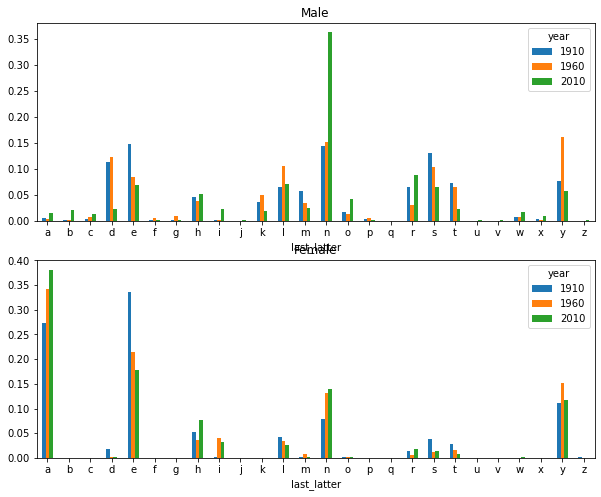

In [79]:
fig,axes=plt.subplots(2,1,figsize=(10,8))
letter_prop['M'].plot(kind='bar',rot=0, ax=axes[0],title='Male')
letter_prop['F'].plot(kind='bar',rot=0, ax=axes[1],title='Female')

`Observation`: we can see that boy names ending in n have experienced significant growth since the 1960s.

In [80]:
letter_prop=table/table.sum()
dny_ts=letter_prop.loc[['d','n','y'],'M'].T

In [81]:
dny_ts.head()

last_latter,d,n,y
year,,,
1880,0.083055,0.153213,0.075760
1881,0.083247,0.153214,0.077451
1882,0.085340,0.149560,0.077537
1883,0.084066,0.151646,0.079144
1884,0.086120,0.149915,0.080405


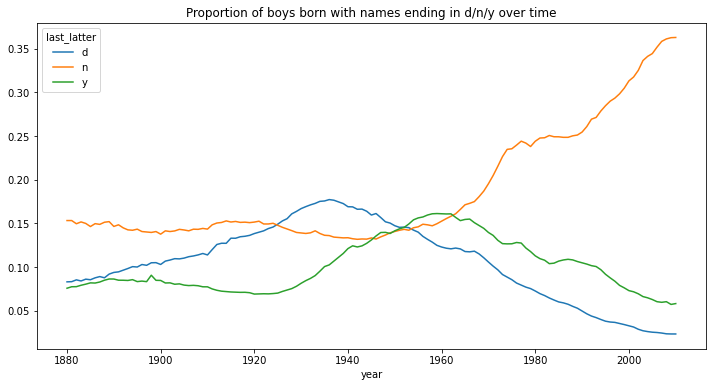

In [85]:
dny_ts.plot(figsize=(12,6), title='Proportion of boys born with names ending in d/n/y over time')
plt.show()

# Boy names that became girl names and vice versa

In [86]:
all_names=pd.Series(top1000.name.unique())

In [88]:
lesley_like=all_names[all_names.str.lower().str.contains('lesl')]

In [89]:
lesley_like

632     Leslie
2294    Lesley
4262    Leslee
4728     Lesli
6103     Lesly
dtype: object

In [90]:
filtered=top1000[top1000.name.isin(lesley_like)]

In [91]:
filtered.groupby('name').births.sum()

name
Leslee      1082
Lesley     35022
Lesli        929
Leslie    370429
Lesly      10067
Name: births, dtype: int64

In [92]:
table=filtered.pivot_table('births',index='year',columns='sex',aggfunc='sum')

In [93]:
table=table.div(table.sum(1),axis=0)

In [94]:
table.tail()

sex,F,M
year,,
2006,1.0,NaN
2007,1.0,NaN
2008,1.0,NaN
2009,1.0,NaN
2010,1.0,NaN


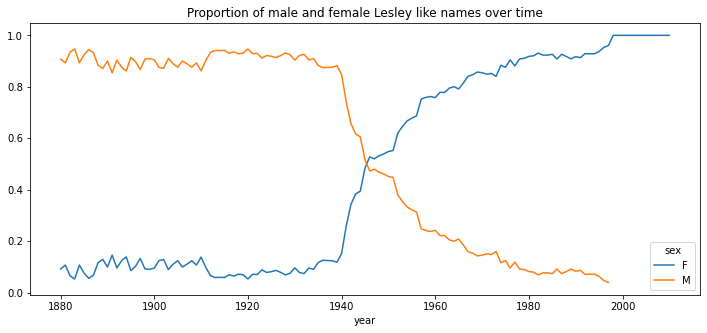

In [104]:
table.plot(figsize=(12,5),title='Proportion of male and female Lesley like names over time')
plt.show()

`Observation`: We can see that `Lesley` was a popular male name up to the 1940s. The frequency of this name for female names then continues to rise.